<a href="https://colab.research.google.com/github/EA-park/AIFFEL/blob/main/%5BExp_02%5DHow_Many_People_Ride_a_Bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

루브릭
1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
 - MSE 손실함수값 3000 이하를 달성

2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
 - RMSE 값 150 이하를 달성

3. 시각화 요구사항이 정확하게 이루어졌는가?
 - 각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#프로젝트 1
손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

###(1) 데이터 가져오기

In [3]:
diabetes = load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
df_X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5']]
df_y = df['s6']
print(df_X.shape, df_y.shape)

(442, 9) (442,)


###(2) 모델에 입력할 데이터 X 준비하기

numpy array로 변환

In [7]:
X = np.array(df_X)
m, N = X.shape
print(N)

9


###(3) 모델에 예측할 데이터 y 준비하기

numpy array로 변환

In [8]:
y = np.array(df_y)

###(4) train 데이터와 test 데이터로 분리하기

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

###(5) 모델 준비하기

가중치 W와 b 설정

In [10]:
W = np.random.rand(N)
b = np.random.rand()
print("W : ", W)
print("b : ", b)

W :  [0.50954087 0.47444985 0.76169015 0.33610544 0.84656839 0.0369617
 0.46110562 0.74254316 0.39118708]
b :  0.7969847005039423


모델 함수 구현

In [11]:
def model(X, W, b):
    N = len(W)
    predictions = 0
    for i in range(N):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

###(6) 손실함수 loss 정의하기

MSE 함수를 사용하는 손실함수 구현

In [12]:
def MSE(y_pred, y):
    mse = ((y_pred - y) ** 2).mean()
    return mse

In [13]:
def loss(X, W, b, y):
    y_pred = model(X, W, b)
    L = MSE(y_pred, y) 
    return L

###(7) 기울기를 구하는 gradient 함수 구현하기

In [14]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [15]:
dW, db = gradient(X_test, W, b, y_test)
print("dW : ", dW)
print("db : ", db)

dW :  [ 0.0721041  -0.01785001  0.00347771  0.00560365  0.00643388 -0.00507336
  0.01432942 -0.02423678  0.01459348]
db :  1.5718016120751335


###(8) 하이퍼 파라미터인 학습률 설정하기

In [16]:
LEARNING_RATE = 0.001

###(9) 모델 학습하기

In [17]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_test, W, b, y_test)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_test, W, b, y_test)
    if i % 10 == 0:
        losses.append(L)

In [18]:
print("W : ", W)
print("b : ", b)

W :  [0.45903143 0.47295582 0.74386542 0.32649815 0.82222774 0.02063289
 0.45778586 0.73691416 0.36766281]
b :  0.1172290854790321


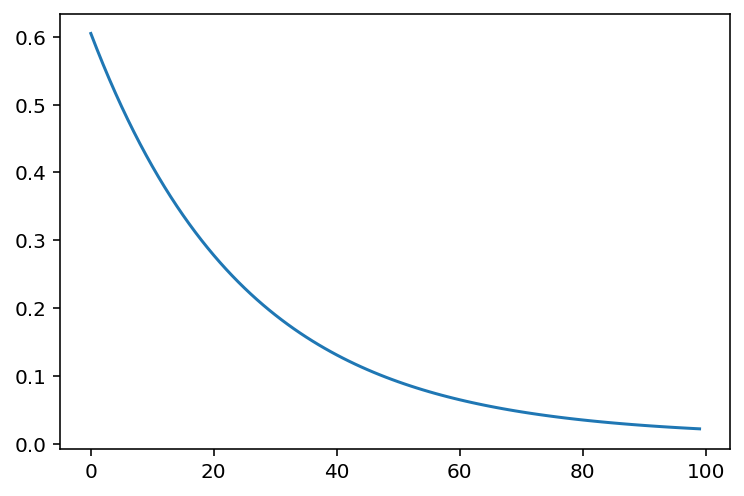

In [19]:
plt.plot(losses)
plt.show()

###(10) test 데이터에 대한 성능 확인하기

In [20]:
y_pred = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.021691960109403965

###(11) 정답 데이터와 예측한 데이터 시각화하기

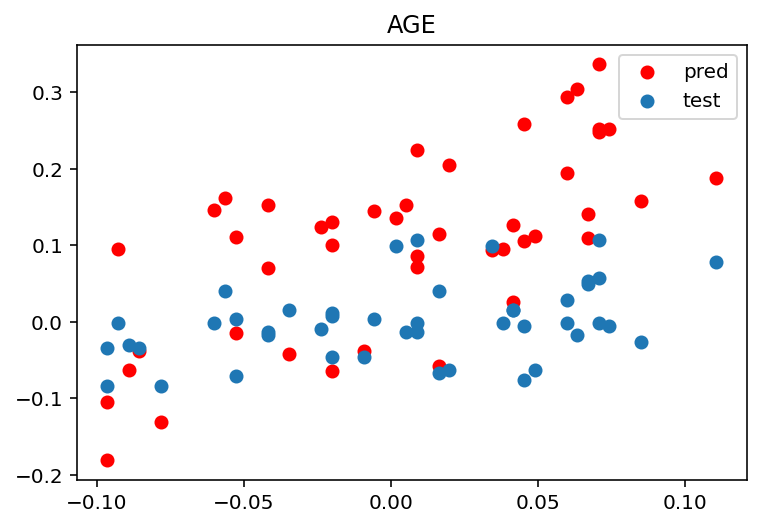

In [21]:
plt.scatter(X_test[:, 0], y_pred, c='red', label='pred')
plt.scatter(X_test[:, 0], y_test, label='test')
plt.title(diabetes.feature_names[0].upper())
plt.legend()
plt.show()

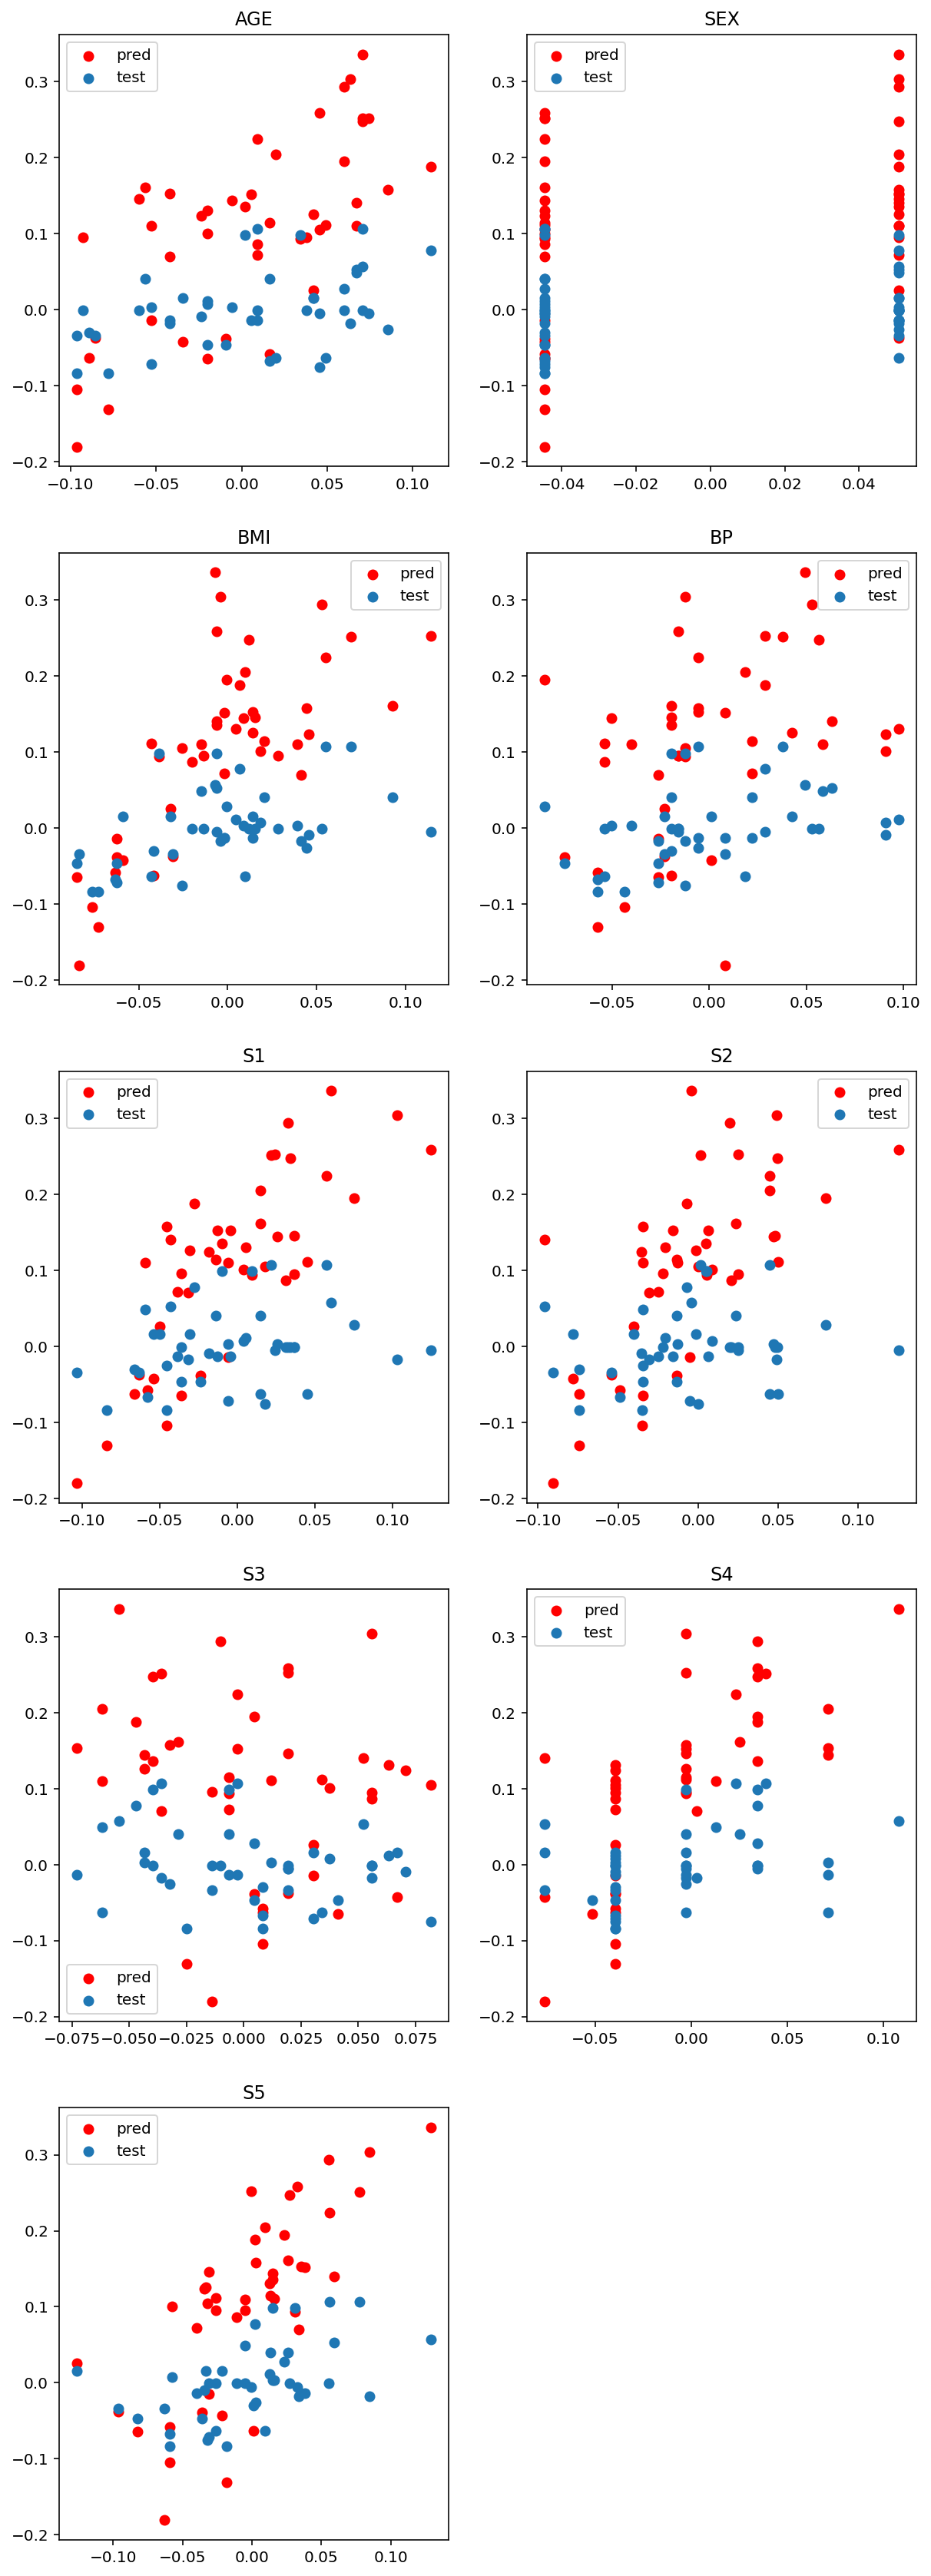

In [22]:
plt.figure(figsize=[10,30])
for i in range(N):
    plt.subplot(5,2,i+1)
    plt.scatter(X_test[:, i], y_pred, c='red', label='pred')
    plt.scatter(X_test[:, i], y_test, label='test')
    plt.title(diabetes.feature_names[i].upper())
    plt.legend()
plt.show()

#프로젝트 2
날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [24]:
from os.path import join
from google.colab import drive

In [25]:
ROOT = '/content/gdrive'
drive.mount(ROOT)

Mounted at /content/gdrive


In [26]:
PROJ = 'MyDrive/AIFFEL/[Exp-02]How Many People'
WORKING_DIR = join(ROOT, PROJ)

###(1) 데이터 가져오기

In [27]:
bike = pd.read_csv(join(WORKING_DIR, 'train.csv'))
print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


###(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [28]:
bike.datetime = pd.to_datetime(bike.datetime)

In [29]:
bike['year'] = bike.datetime.dt.year
bike['month'] = bike.datetime.dt.month
bike['day'] = bike.datetime.dt.day
bike['hour'] = bike.datetime.dt.hour
bike['minute'] = bike.datetime.dt.minute
bike['second'] = bike.datetime.dt.second
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


###(3) year, month, day, hour, minute, second 데이터 개수 시각화하기

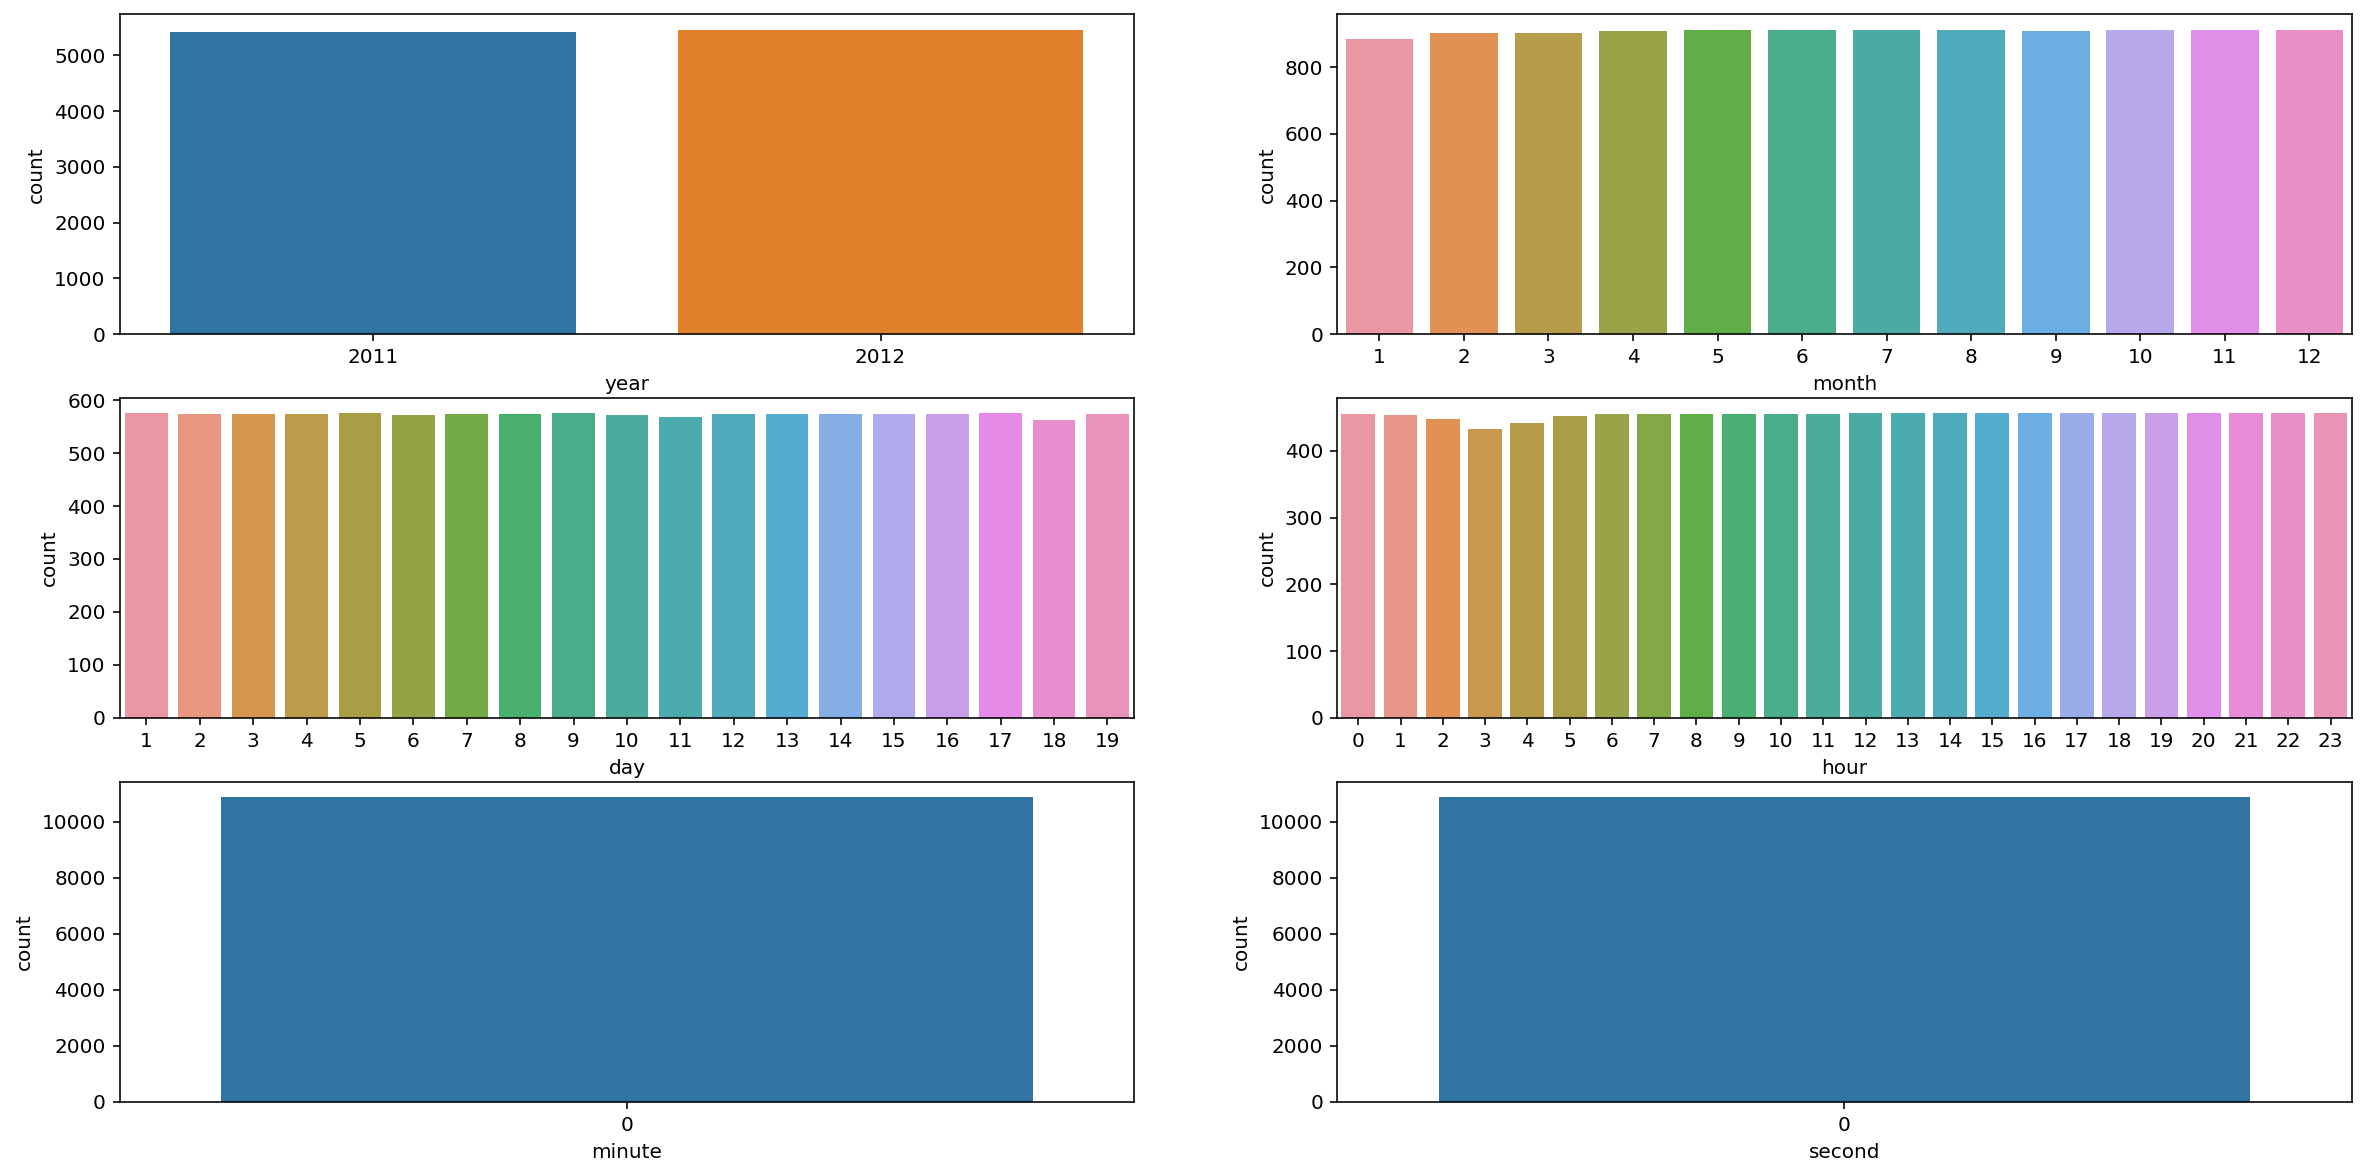

In [30]:
plot_element = ['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=[20, 10])
for iter, argument in enumerate(plot_element):
    plt.subplot(3, 2, iter+1)
    sns.countplot(data=bike, x=argument)
plt.show()

###(4) X, y 컬럼 선택 및 train/test 데이터 분리

In [31]:
# minute, second 컬럼 삭제
bike = bike[['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

In [32]:
active_elements = bike.columns.tolist()
X = np.array(bike[active_elements[:-1]])
y = np.array(bike['count'])
print(X.shape, y.shape) 

(10886, 14) (10886,)


In [33]:
m, N = X.shape
print(N)

14


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

###(5) LinearRegression 모델 학습

In [35]:
model = LinearRegression()

###(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [36]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)

[185. 310. 649. ... 270. 235.   1.]


In [37]:
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("MSE = ", mse)
print("RMSE = ", rmse)

MSE =  7.357631320190511e-26
RMSE =  2.7124954046395193e-13


###(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

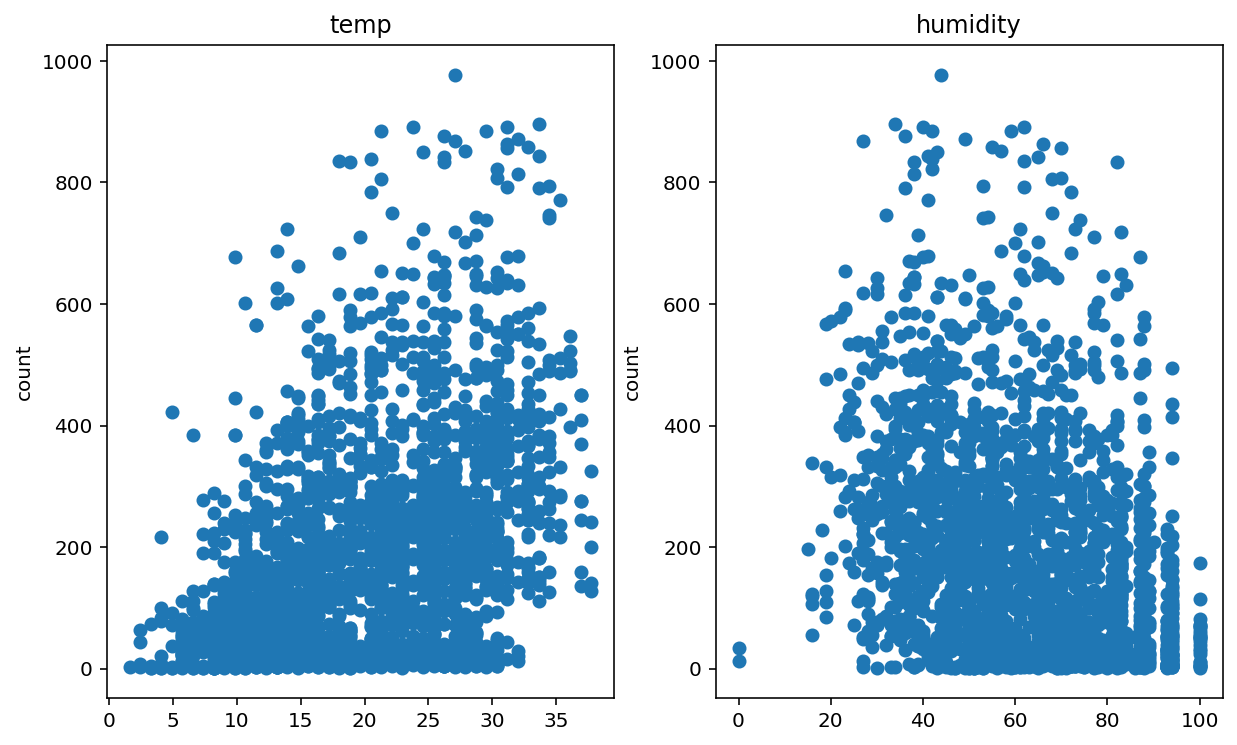

In [38]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.scatter(X_test[:,8], predictions)
#plt.scatter(X_test[:,8], y_test, c='red')
plt.title('temp')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.scatter(X_test[:,10], predictions)
#plt.scatter(X_test[:,10], y_test, c='red')
plt.title('humidity')
plt.ylabel('count')
plt.show()



---



#회고

###1. 이번 프로젝트에서 어려웠던 점

- 이번 프로젝트는 지난 프로젝트에 비해 어렵지는 않았음
- 그러나 여전히 시간은 많이 걸림

###2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

1) 알아낸 점
- 데이터 전처리가 모델 설정 못지않게 중요함

2) 모호한 점
- 프로젝트 2의 예측값이 테스트 데이터의 결과값과 너무 같아서 overfitting이 아닌가 생각됨
- 현재 구글 드라이브를 마운트 시켜서 파일 읽는 부분을, 깃허브에 올리고 다른 사람이 사용할 때에는 파일 경로가 달라져야 할 것 같은데, 해당 부분은 어떻게 설정하는지 아직 확인 못함

###3. 루브릭 평가 지표를 맞추기 위해 시도한 것들

- Exp-01에서 사용했던 데이터셋의 정보 확인 방법 복습(DESC, feature_names 등)

###4. 다짐
- hyperparameter optimization이나 학습에 사용하는 컬럼값 결정하는 것 등 더 깊게 하고 싶은 내용들이 있지만, 일단은 진도부터 따라잡는 것이 목표